In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
gender_submission = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
women_train = train.loc[train['Sex'] == 'female']['Survived']
men_train = train.loc[train['Sex'] == 'male']['Survived']

    wom

In [6]:
women_train.head()

1    1
2    1
3    1
8    1
9    1
Name: Survived, dtype: int64

In [7]:
surv_women_rate = round((sum(women_train)/len(women_train)) * 100, 2)
surv_men_rate = round((sum(men_train)/len(men_train))*100,2)

print(f"{surv_women_rate}% of the women have survived")
print(f"{surv_men_rate}% of the men have survived")


74.2% of the women have survived
18.89% of the men have survived


In [8]:
## Starting Machine Learning

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
y = train['Survived']

features = ['Pclass', 'Sex','SibSp', 'Parch']
x = pd.get_dummies(train[features])
x_test = pd.get_dummies(test[features])

In [11]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

In [12]:
model.fit(x,y)

RandomForestClassifier(max_depth=5, random_state=1)

In [13]:
predict = model.predict(x_test)

In [14]:
output = pd.DataFrame({'PassengerId':test.PassengerId, 'Survived': predict})

In [15]:
output.to_csv('my_submission.csv', index=False)
print('You have successfully submitted it')

You have successfully submitted it


---------------------

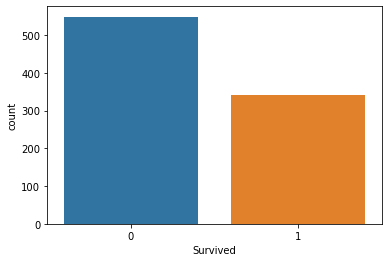

In [16]:
sns.countplot(train['Survived'])

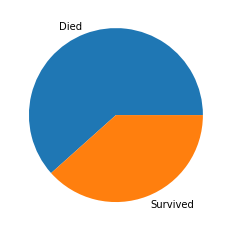

In [17]:
lab = train["Survived"].value_counts().keys().tolist()
val = train["Survived"].value_counts().values.tolist()

plt.pie(val, labels=['Died', 'Survived'])
plt.show()

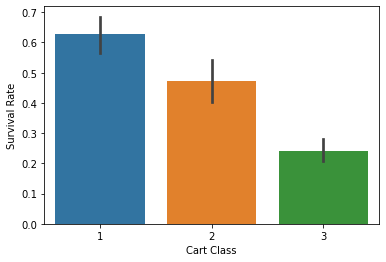

In [18]:
## Survival per Cart's class
sns.barplot(x = train.Pclass, y = train.Survived)
plt.xlabel('Cart Class')
plt.ylabel("Survival Rate")
plt.show()

first class Passangers were the heighest to survive

In [19]:
## each sex survival rate in each class
train.pivot_table('Survived', index = train.Sex, columns=train.Pclass)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [20]:
survival_pivot_table = train.pivot_table('Survived', index = train.Sex, columns=train.Pclass)

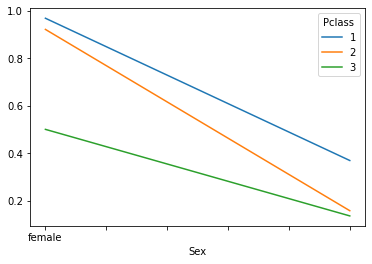

In [21]:
survival_pivot_table.plot()

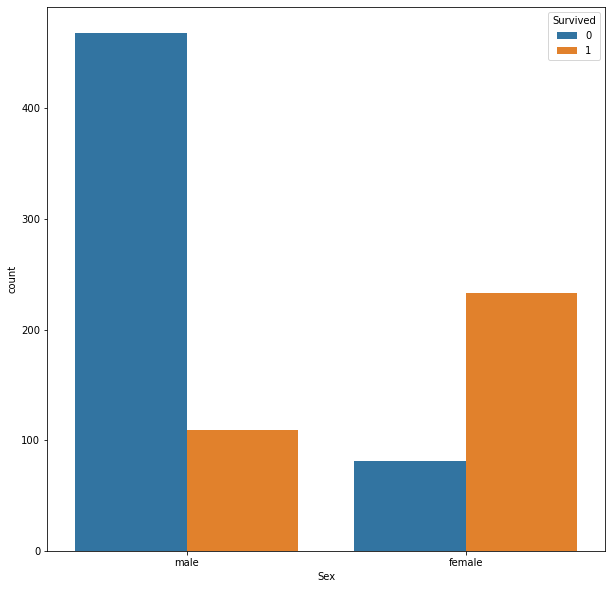

In [22]:
## Rate of survival for men and women
plt.subplots(figsize = (10,10))
sns.countplot('Sex', hue='Survived',data=train)
plt.show()

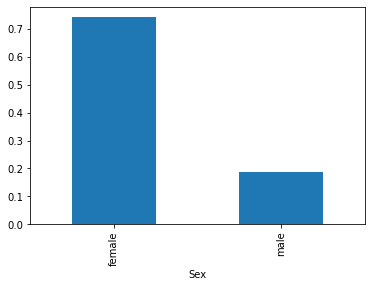

In [23]:
## males compared to female survival rate
train.groupby('Sex').Survived.mean().plot(kind='bar')
plt.show()

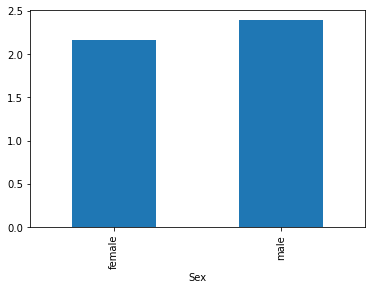

In [24]:
train.groupby('Sex').Pclass.mean().plot(kind='bar')


In [25]:
len(men_train)
len(women_train)

314